<a href="https://colab.research.google.com/github/2303A52102/AIML_2303A52102/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a decision tree classifier and visualize the tree.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/weather_forecast_data.csv'
data = pd.read_csv(file_path)

In [4]:
X = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = data['Rain']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

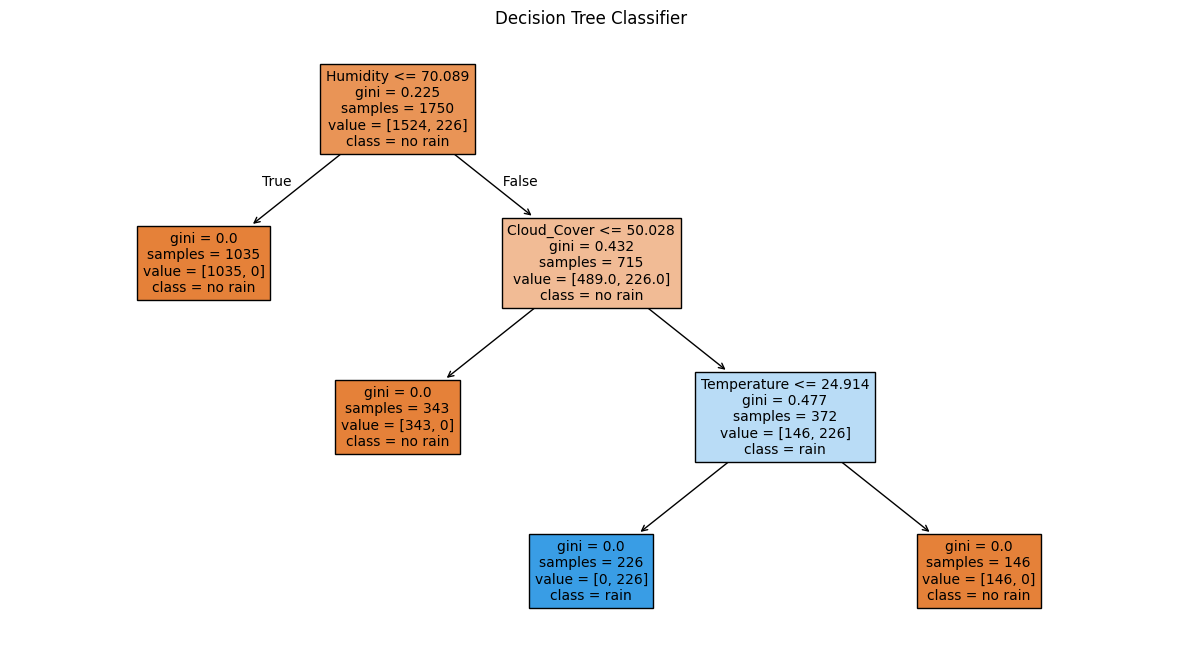

In [7]:
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()

. **Evaluate the model's performance using accuracy and confusion matrix**

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
y_pred = clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

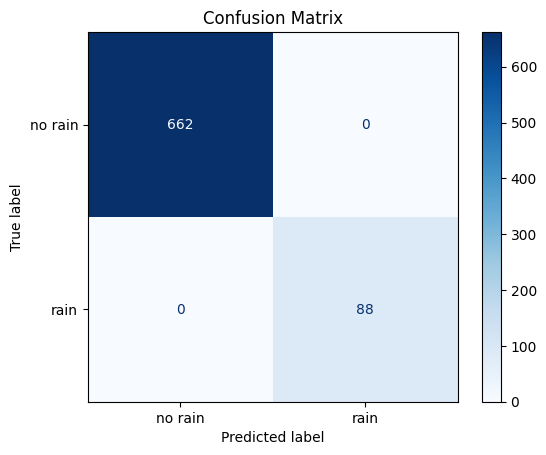

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

. Implement pruning (set max_depth or min_samples_split) and compare
accurancy

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)
y_pred_unpruned = clf_unpruned.predict(X_test)
accuracy_unpruned = accuracy_score(y_test, y_pred_unpruned)
print(f"Accuracy without pruning: {accuracy_unpruned:.2f}")

Accuracy without pruning: 1.00


In [15]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy with pruning (max_depth=3, min_samples_split=10): {accuracy_pruned:.2f}")

Accuracy with pruning (max_depth=3, min_samples_split=10): 1.00


In [16]:
print(f"Accuracy improvement with pruning: {accuracy_pruned - accuracy_unpruned:.2f}")

Accuracy improvement with pruning: 0.00


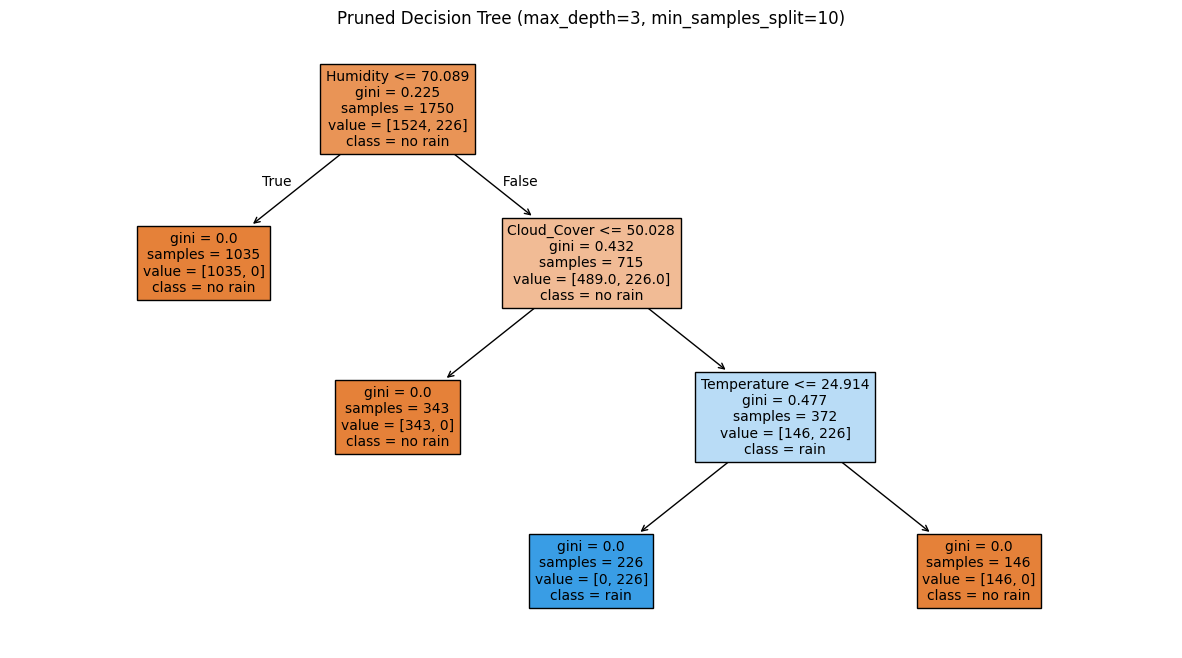

In [17]:
plt.figure(figsize=(15, 8))
plot_tree(clf_pruned, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Pruned Decision Tree (max_depth=3, min_samples_split=10)")
plt.show()

Use the decision tree to identify the most important feature(s).


In [18]:
import numpy as np

In [19]:
feature_importances = clf.feature_importances_

In [21]:
importance_df = pd.DataFrame({
      'Feature': X.columns,
          'Importance': feature_importances
          }).sort_values(by='Importance', ascending=False)


In [22]:
print("Feature Importances:")
print(importance_df)

Feature Importances:
       Feature  Importance
0  Temperature    0.450675
3  Cloud_Cover    0.334662
1     Humidity    0.214663
2   Wind_Speed    0.000000
4     Pressure    0.000000


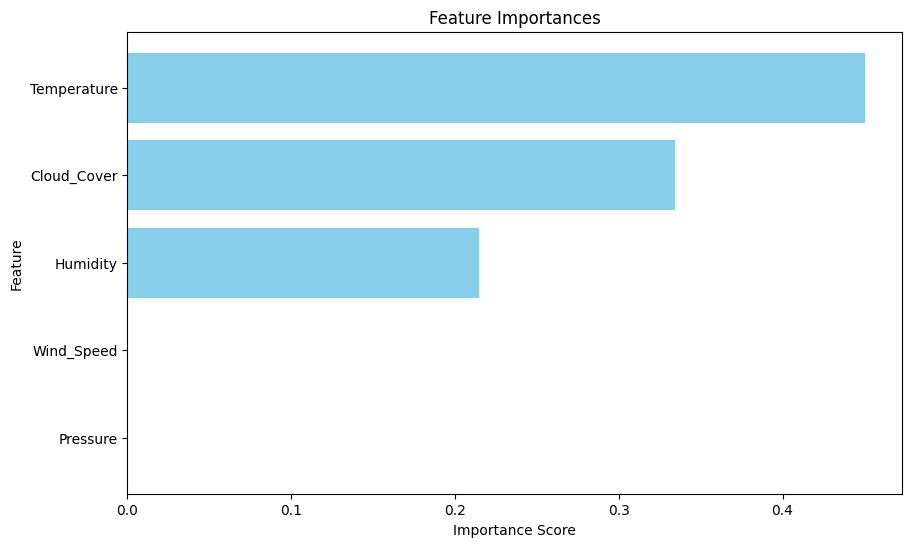

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

Compare the decision tree model’s performance with and without pruning

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)
y_pred_unpruned = clf_unpruned.predict(X_test)
accuracy_unpruned = accuracy_score(y_test, y_pred_unpruned)

In [26]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

In [27]:
print(f"Accuracy without pruning: {accuracy_unpruned:.2f}")
print(f"Accuracy with pruning (max_depth=3, min_samples_split=10): {accuracy_pruned:.2f}")
print(f"Difference in accuracy: {accuracy_pruned - accuracy_unpruned:.2f}")

Accuracy without pruning: 1.00
Accuracy with pruning (max_depth=3, min_samples_split=10): 1.00
Difference in accuracy: 0.00


In [28]:
conf_matrix_unpruned = confusion_matrix(y_test, y_pred_unpruned, labels=clf_unpruned.classes_)
print("\nConfusion Matrix Without Pruning:")
print(conf_matrix_unpruned)


Confusion Matrix Without Pruning:
[[662   0]
 [  0  88]]


In [29]:
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned, labels=clf_pruned.classes_)
print("\nConfusion Matrix With Pruning:")
print(conf_matrix_pruned)


Confusion Matrix With Pruning:
[[662   0]
 [  0  88]]


In [31]:
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned, labels=clf_pruned.classes_)
print("\nConfusion Matrix With Pruning:")
print(conf_matrix_pruned)


Confusion Matrix With Pruning:
[[662   0]
 [  0  88]]


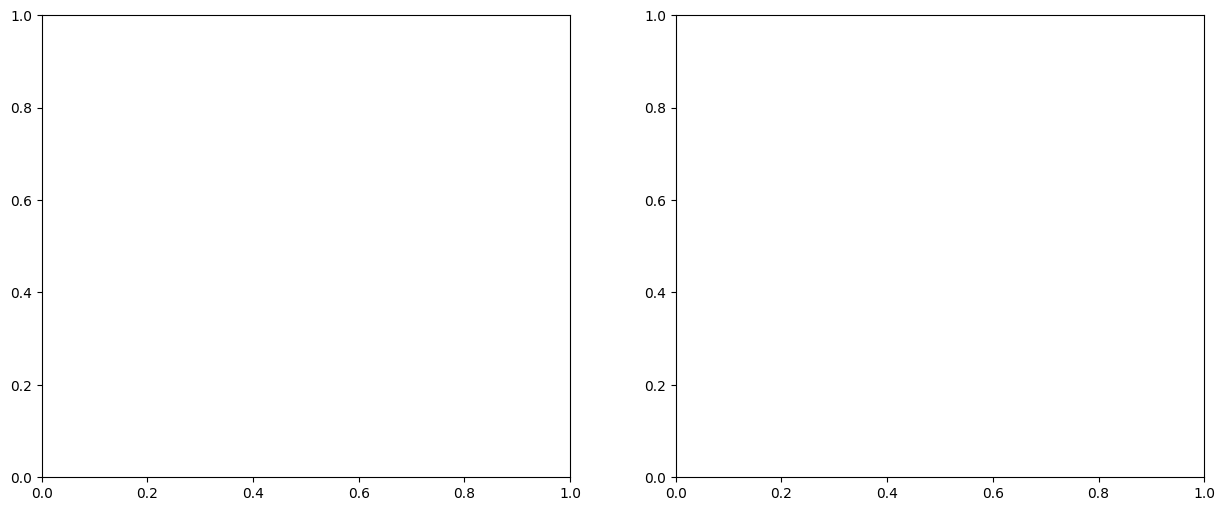

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

In [33]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_unpruned, display_labels=clf_unpruned.classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix Without Pruning")

Text(0.5, 1.0, 'Confusion Matrix Without Pruning')

In [34]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pruned, display_labels=clf_pruned.classes_).plot(ax=axes[1], cmap="Blues")
axes[1].set_title("Confusion Matrix With Pruning")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>